In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
diabetes = pd.read_csv('diabetes.csv')

In [6]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
diabetes.shape

(768, 9)

In [8]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### EDA for the dataset has been done using Tableau

### Missing or Null values

In [13]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### No missing or null values are present in the dataset

### Outlier detection and treatment

In [22]:
diabetes[diabetes.BloodPressure == 0].shape[0]

35

##### A living patient cannot have a blood pressure of zero.

In [23]:
diabetes[diabetes.Glucose == 0].shape[0]

5

##### Glucose level can never be equal to zero.

In [25]:
diabetes[diabetes.SkinThickness == 0].shape[0]

227

##### Skin Fold thickness can be rarely less than 10mm. Zero is not remotely possible.

In [27]:
diabetes[diabetes.BMI == 0].shape[0]

11

##### BMI can never be zero even if the patient is very very underweight.

In [28]:
diabetes[diabetes.Insulin == 0].shape[0]

374

##### In a very rare situation, a person can have zero insulin.

#### All the above observations show that there have been some discrepancies in the data input process or that simply the data was not available for all the patient records.


#### We will drop the rows where Blood Pressure, BMI and Glucose have zero values. 

In [29]:
diabetes_after_dc = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]

In [31]:
diabetes_after_dc.shape

(724, 9)

In [32]:
diabetes_after_dc.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#### Separating the dataset into predictor and response variables

In [50]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [51]:
X = diabetes_after_dc[features]
y = diabetes_after_dc.Outcome

In [52]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [53]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = diabetes_after_dc.Outcome, random_state=0)

### Random Forest Model

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.785


In [73]:
from sklearn import metrics

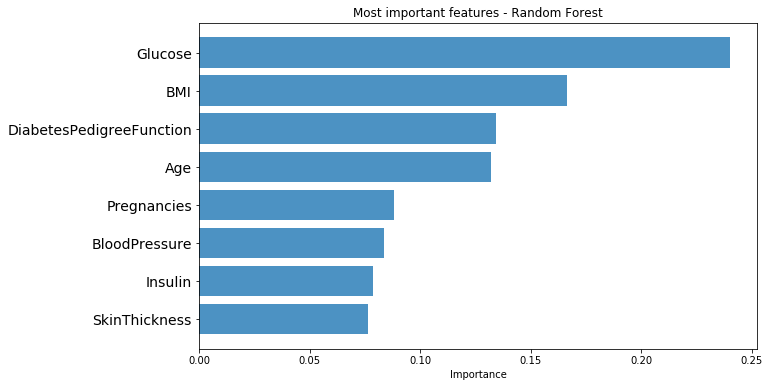

In [74]:
feature_names = X_train.columns
feature_imports = rf.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest')
plt.show()